## MULTICLASS  LOGISTIC REGRESSION 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Reading CSV files
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,DIABETES,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,0.0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,0.0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,0.0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,0.0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,1.0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,0.0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,0.0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Adding independent and dependent columns from dataframe to train model
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI',  'SCORE', 'SFHL', 'HFHL']]
dependentVar = 'DPDB_VAL'

y = df[dependentVar].values

In [ ]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [ ]:
# Splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
# Training LR model
from sklearn.linear_model import LogisticRegression
# LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X, y)
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model.fit(x_train, y_train)


/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
model.score(x_test, y_test)
# model1.score(x_test, y_test)
#checking the Accuracy of the model

0.7395128552097429

In [ ]:
from scipy.stats import itemfreq
itemfreq(y_test)

<ipython-input-79-819e16e8029e>:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_test)


array([[  0., 854.],
       [  1., 252.],
       [  2., 266.],
       [  3., 106.]])

In [ ]:
# %matplotlib inline
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

In [ ]:
df[['DPDB_VAL']].value_counts()

DPDB_VAL
0.0         3375
2.0         1048
1.0         1021
3.0          466
dtype: int64

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[782,  72,   0,   0],
       [204,  48,   0,   0],
       [  0,   9, 233,  24],
       [  0,   5,  71,  30]])

Text(69.0, 0.5, 'Truth')

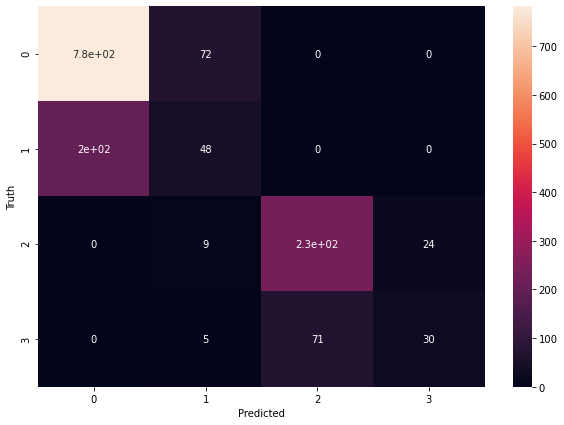

In [ ]:
#plotting confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#checking the confusion matrix, precision, recall and f1 score
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[782  72   0   0]
 [204  48   0   0]
 [  0   9 233  24]
 [  0   5  71  30]]
Accuracy score: 0.7395128552097429
Precision Score :  0.6183288318690877
Recall Score :  0.5662814436338295
F1 score:  0.5728121307153895


/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       854
         1.0       0.36      0.19      0.25       252
         2.0       0.77      0.88      0.82       266
         3.0       0.56      0.28      0.38       106

    accuracy                           0.74      1478
   macro avg       0.62      0.57      0.57      1478
weighted avg       0.70      0.74      0.71      1478



/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

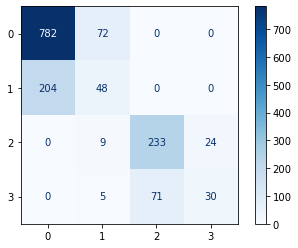

In [ ]:
# %matplotlib inline
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

## Logistic Regression 
## Predicting Diabetic patients

In [ ]:
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,DIABETES,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,0.0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,0.0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,0.0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,0.0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,1.0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,0.0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,0.0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [ ]:
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'SCORE','DEPRESSION', 'SFHL', 'HFHL']]
dependentVar = 'DIABETES'

y = df[dependentVar].values

In [ ]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver='lbfgs')
model.fit(x_train, y_train)

/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
model.score(x_test, y_test)

0.7665764546684709

In [ ]:
from scipy.stats import itemfreq
itemfreq(y_test)

<ipython-input-64-819e16e8029e>:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_test)


array([[0.00e+00, 1.12e+03],
       [1.00e+00, 3.58e+02]])

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1045,   75],
       [ 270,   88]])

Text(69.0, 0.5, 'Truth')

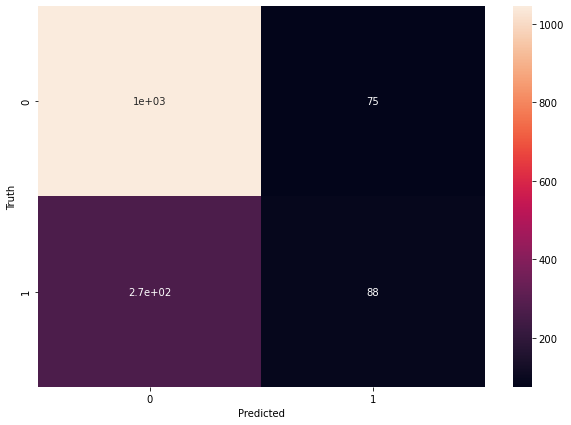

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


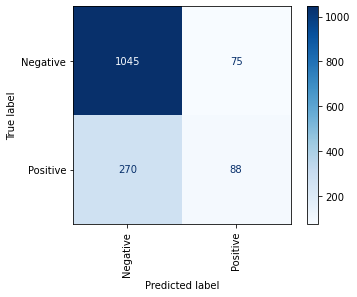

In [ ]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[1045   75]
 [ 270   88]]
Accuracy score: 0.7665764546684709
Precision Score :  0.6672770533485736
Recall Score :  0.5894228850758181
F1 score:  0.5980640609789262


/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


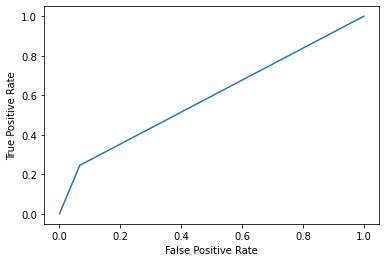

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

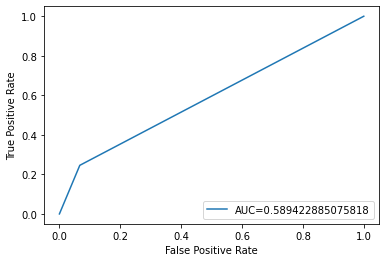

In [ ]:
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Logistic Regression
## Predicting Depression

In [ ]:
df = pd.read_csv('dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,DIABETES,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,0.0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,0.0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,0.0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,0.0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,1.0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,1.0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,0.0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,0.0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [ ]:
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'SCORE','DIABETES', 'SFHL', 'HFHL']]
dependentVar = 'DEPRESSION'

y = df[dependentVar].values

In [ ]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver='lbfgs')
model.fit(x_train, y_train)

/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
model.score(x_test, y_test)

1.0

In [ ]:
from scipy.stats import itemfreq
itemfreq(y_test)

<ipython-input-45-819e16e8029e>:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_test)


array([[0.000e+00, 1.106e+03],
       [1.000e+00, 3.720e+02]])

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., ..., 1., 0., 1.])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1106,    0],
       [   0,  372]])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[1106    0]
 [   0  372]]
Accuracy score: 1.0
Precision Score :  1.0
Recall Score :  1.0
F1 score:  1.0


/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


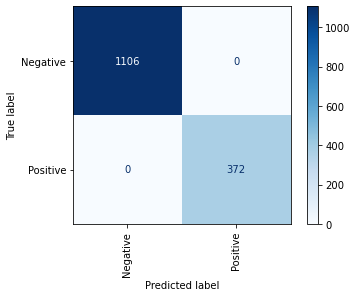

In [ ]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

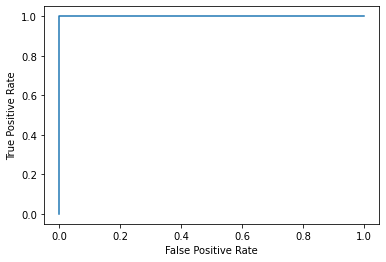

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

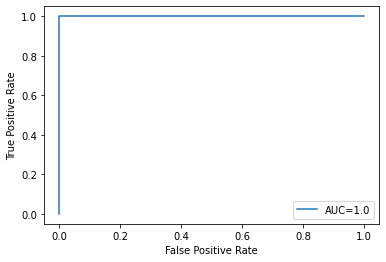

In [ ]:
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()